# Embeddings

In [1]:
import cv2 
import tensorflow as tf
from tensorflow.python import keras
import numpy as np
import matplotlib.pyplot as plt

import os
import glob
import random

In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi

os.environ['KAGGLE_USERNAME'] = "xxxxxx"                 #Manually input from kaggle
os.environ['KAGGLE_KEY'] = "xxxxxx"   #Manually input from kaggle

api = KaggleApi()
api.authenticate()


api.dataset_download_files('kvpratama/pokemon-images-dataset', path="./Images/", unzip=True)
del api

Convolutional characteristics dataset

In [5]:
base_model = tf.keras.applications.ResNet101(
    include_top = False, 
    weights = "imagenet",
    input_shape=(224,224,3)
)

171446536/171446536 [==============================] - 59s 0us/step


In [10]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential

model = Sequential([
    base_model, 
    Flatten(),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 7, 7, 2048)        42658176  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
Total params: 42,658,176
Trainable params: 42,552,832
Non-trainable params: 105,344
_________________________________________________________________


In [42]:
def conv_features(img_path: str) -> np.array:
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    return model.predict(np.array([img]), verbose = 0)

In [43]:
features = []
names =  []

for path in glob.glob("Images/pokemon/pokemon/" + "/*.png"):
    features.append( conv_features(path).reshape(-1) )
    names.append(path)
print("Number of Pokemons: {}", len(features))

Number of Pokemons: {} 819


In [60]:
features = np.array(features)
names = np.array(names)

#### Calculate the closest image

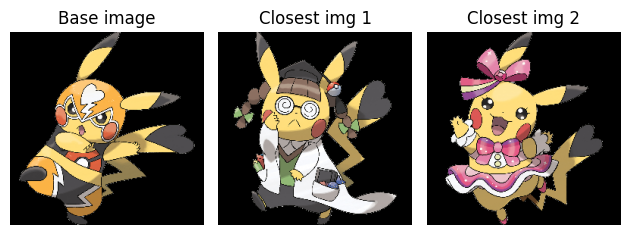

In [145]:
from scipy import spatial

test_num = random.randint(0, len(names)-1)
test_img = np.array(conv_features(names[test_num]).reshape(-1))

dist = np.array([spatial.distance.cosine(test_img, i) for i in features])
min_index = dist.argsort()[:3]

fig, axs = plt.subplots(1, 3)

for i in range(3):
    img = cv2.imread(names[min_index[i]])
    axs[i].imshow( cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )
    axs[i].axis('off')

    if i == 0:
        axs[i].set_title('Base image')
    else:
        axs[i].set_title('Closest img {}'.format(i))

plt.tight_layout()
plt.show()